In [1]:
# importing necessary libraries for the analysis process
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read CSV file 
data = pd.read_csv("Data/sales_data.csv")
# take an overview of the data
data.head()

,date,product,category,price,quantity,revenue
0,2022-01-01,Smartphone,Electronics,600.0,10.0,6000.0
1,2022-01-01,Laptop,Electronics,1200.0,5.0,6000.0
2,2022-01-02,T-Shirt,Clothing,20.0,50.0,1000.0
3,2022-01-03,Headphones,Electronics,100.0,20.0,2000.0
4,2022-01-04,T-Shirt,Clothing,20.0,25.0,500.0


In [3]:
# get some information about the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      369 non-null    object 
 1   product   369 non-null    object 
 2   category  369 non-null    object 
 3   price     367 non-null    float64
 4   quantity  368 non-null    float64
 5   revenue   368 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.4+ KB


In [4]:
# we may need to use the date column, so we should convert it from object to be a datetime64
data["date"] = pd.to_datetime(data["date"])


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      369 non-null    datetime64[ns]
 1   product   369 non-null    object        
 2   category  369 non-null    object        
 3   price     367 non-null    float64       
 4   quantity  368 non-null    float64       
 5   revenue   368 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 17.4+ KB


In [6]:
# check if the data has missing values 
data.isnull().sum()

date        0
product     0
category    0
price       2
quantity    1
revenue     1
dtype: int64

In [7]:
# droping the rows conatining missing values
data=data.dropna()

In [8]:
# check if the data has duplicated rows
data.duplicated().sum()

1

In [9]:
# reomve duplicated rows
data=data.drop_duplicates()

In [10]:
totalRevenue=data["revenue"].sum()
totalRevenue

747230.0

In [11]:
products = data["product"].unique().tolist()

In [12]:
products

['Smartphone',
 'Laptop',
 'T-Shirt',
 'Headphones',
 'Watch',
 'Tablet',
 'Coat',
 'Smartwatch',
 'Speaker',
 'Backpack',
 'Hoodie',
 'Sneakers',
 'Wallet',
 'Jeans']

In [13]:
# plt.bar(products,data["revenue"])
product=data.groupby("product")["revenue"].sum().sort_values(ascending=False)

In [14]:
product

product
Smartphone    427800.0
Smartwatch     58800.0
Speaker        39680.0
Coat           33800.0
Watch          30450.0
Sneakers       21600.0
Jeans          20650.0
Backpack       20400.0
T-Shirt        20100.0
Hoodie         19800.0
Headphones     18000.0
Tablet         18000.0
Wallet         12150.0
Laptop          6000.0
Name: revenue, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Smartphone'),
  Text(1, 0, 'Smartwatch'),
  Text(2, 0, 'Speaker'),
  Text(3, 0, 'Coat'),
  Text(4, 0, 'Watch'),
  Text(5, 0, 'Sneakers'),
  Text(6, 0, 'Jeans'),
  Text(7, 0, 'Backpack'),
  Text(8, 0, 'T-Shirt'),
  Text(9, 0, 'Hoodie'),
  Text(10, 0, 'Headphones'),
  Text(11, 0, 'Tablet'),
  Text(12, 0, 'Wallet'),
  Text(13, 0, 'Laptop')])

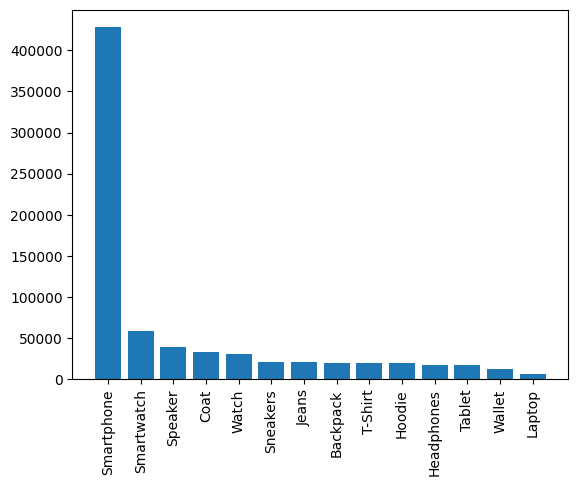

In [17]:
xaxis=product.keys().tolist()
yaxis=product.tolist()
plt.bar(xaxis,yaxis)
plt.xticks(rotation=90)

In [80]:
## the Smartphone has much revenue by generating 427800 per year

In [18]:
product["Smartphone"]

427800.0

In [19]:
data["price"].mean()

210.65934065934067

In [20]:
data["quantity"].sum()

5270.0

In [21]:
categories = data.groupby("category")["revenue"].sum().sort_values(ascending=False)
categories

category
Electronics    509480.0
Accessories    101400.0
Clothing        93150.0
Shoes           20640.0
Bags            19500.0
Clohting         1200.0
Shoeses           960.0
Bgas              900.0
Name: revenue, dtype: float64

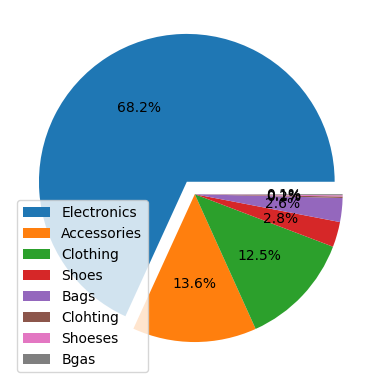

####################################################################################################
the total revenue of the highiest category is 509480.0


In [23]:
explode=[0.1,0,0,0,0,0,0,0]
plt.pie(categories,autopct = '%1.1f%%',explode=explode)
plt.legend(categories.keys(),loc="lower left")
plt.show()
print("#" *100)
print(f"the total revenue of the highiest category is {categories.max()}")

In [24]:
#  so Electronics are the highest category and has highest revenue with 68.2% of the total

In [25]:
print(f"the Avreage revenue per sale is { data.revenue.mean() }")

the Avreage revenue per sale is 2052.8296703296705


In [27]:
data["quarters"]=data.date.dt.quarter

In [29]:
quarters_Revenue = data.groupby("quarters")["revenue"].sum()

In [30]:
quarters_Revenue

quarters
1    182100.0
2    177370.0
3    195430.0
4    192330.0
Name: revenue, dtype: float64

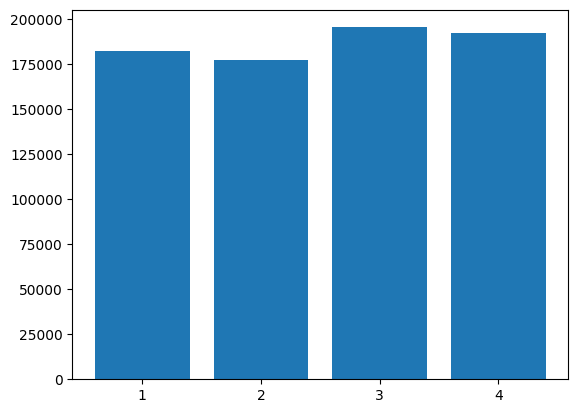

In [34]:
quarters =["Q1","Q2","Q3","Q4"]
plt.bar(quarters,quarters_Revenue)
plt.show()

In [35]:
# so we find that the third quarter has the highest revenue ~ 195430


## conclusion
***
#### After cleaning the dataset and applying some necessary calculations we get up with some valuable insights

- The total company revenue this year is 747230 $\$$
- The Smartphone has the highest revenue generating 427800 $\$$ per year followed by Smartwatch with 58800 $\$$ 
- The average number of items sold by the company per year is 5270 with the average price for items of 210.65 $\$$ 
- Electronics have the highest sales among the different categories sold by the company with 68.2% of the total revenue and 509480 $\$$ 
- followed by Accessories with 101400 $\$$ 
- the third quarter has the highest revenue ~ 195430 $\$$
